In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 指定默认字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']  

In [2]:
github_file1_path = r'C:\Users\yst\Desktop\github\github_dataset.csv'
df = pd.read_csv(github_file1_path).head(2000)
print(df.head())

                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  


In [3]:
# 筛选标称列
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_column = categorical_df.columns
# 给出各标称属性的频数
for name in categorical_column:
    # 输出标称属性的取值及对应频数（只显示前五行）
    print(categorical_df[name].value_counts().head())

repositories
kameshsampath/ansible-role-rosa-demos    2
aloisdeniel/bluff                        2
antoniaandreou/github-slideshow          2
jgthms/bulma-start                       2
artkirienko/hlds-docker-dproto           2
Name: count, dtype: int64
language
JavaScript    253
Python        155
HTML           72
Java           44
CSS            37
Name: count, dtype: int64


In [4]:
# 筛选数值列
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_column = numeric_df.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的五数概括为:\n{1}".format(name, numeric_df[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}".format(name, numeric_df[name].isnull().sum()))

列stars_count的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
列stars_count的缺失值个数为:0
列forks_count的五数概括为:
count    1052.000000
mean       53.884981
std       127.699729
min         0.000000
25%         1.000000
50%         6.000000
75%        38.250000
max       973.000000
Name: forks_count, dtype: float64
列forks_count的缺失值个数为:0
列issues_count的五数概括为:
count    1052.000000
mean        8.656844
std        32.445154
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       612.000000
Name: issues_count, dtype: float64
列issues_count的缺失值个数为:0
列pull_requests的五数概括为:
count    1052.000000
mean        4.374525
std        27.913732
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       567.000000
Name: pull_requests, dtype: float64
列pull_requests的缺失值个数为:0
列contributors的五

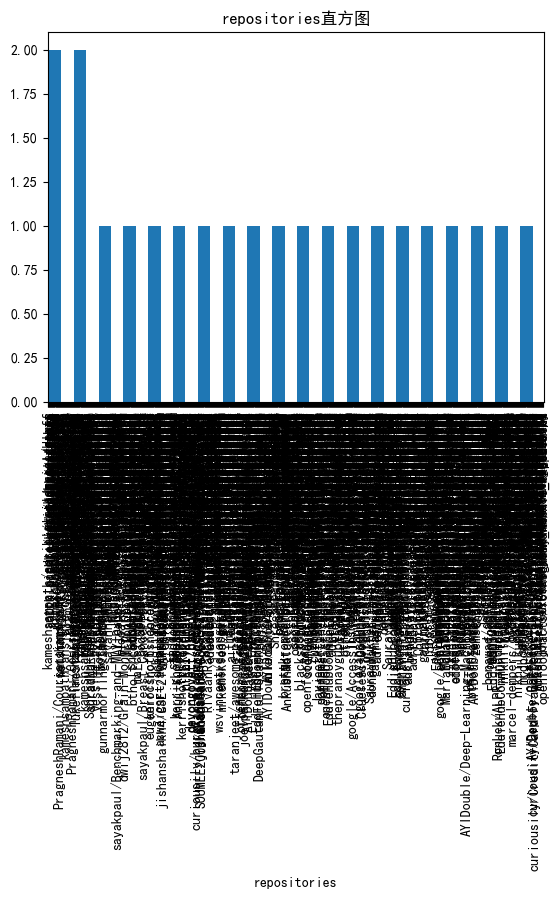

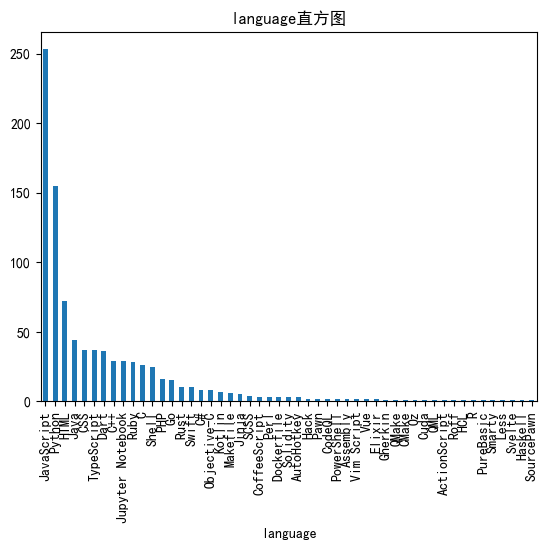

In [5]:
# 为标称列绘制直方图
for name in categorical_column:
    categorical_df[name].value_counts().plot(kind='bar')
    plt.title(str(name) + "直方图")
    plt.show()

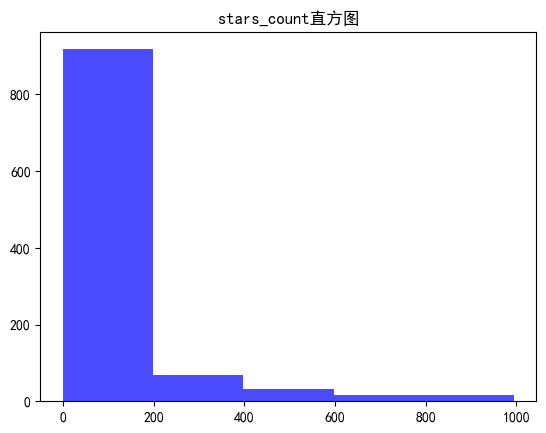

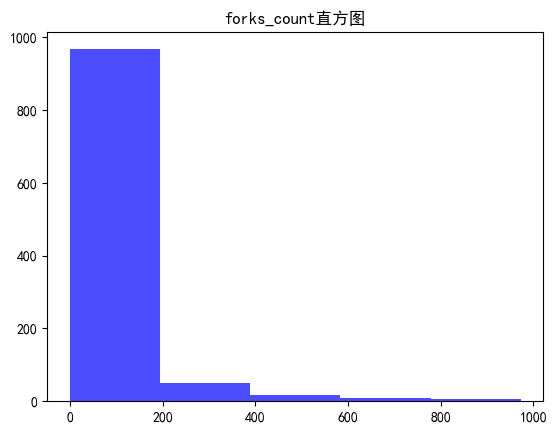

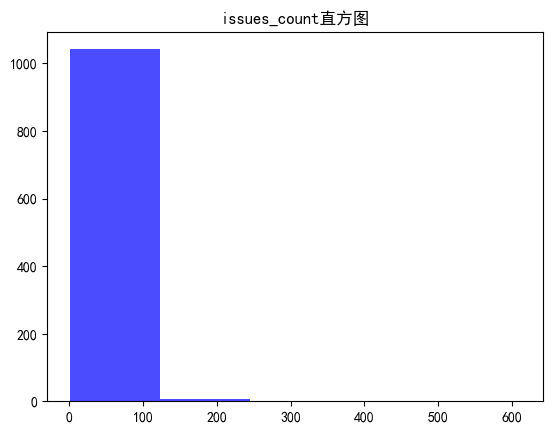

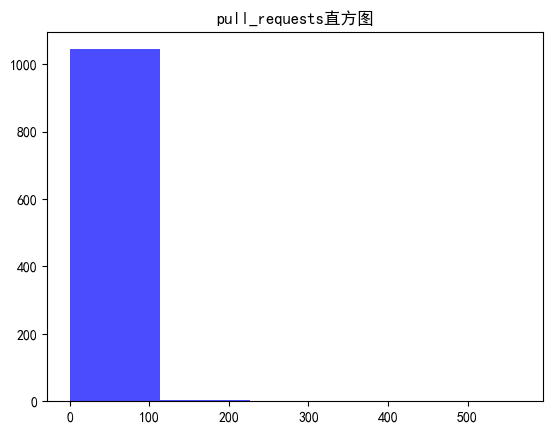

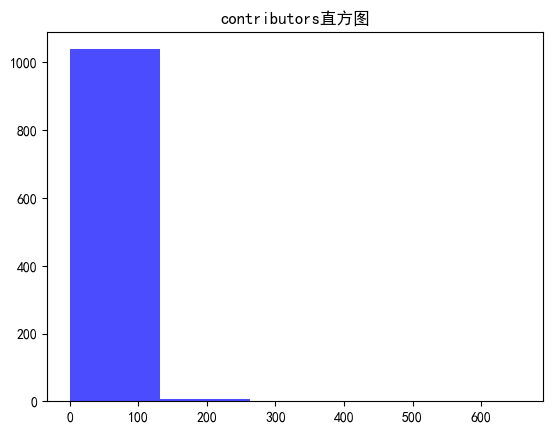

In [6]:
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[name], bins=5, color='blue', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

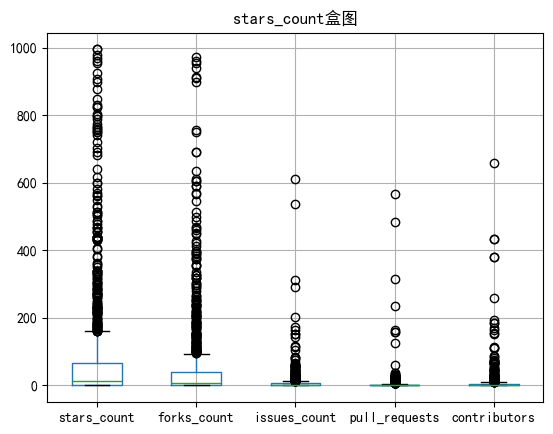

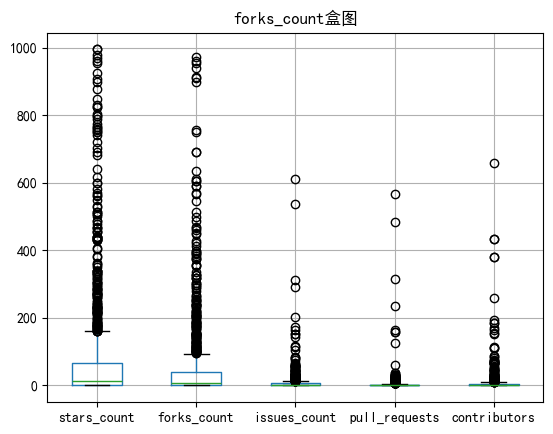

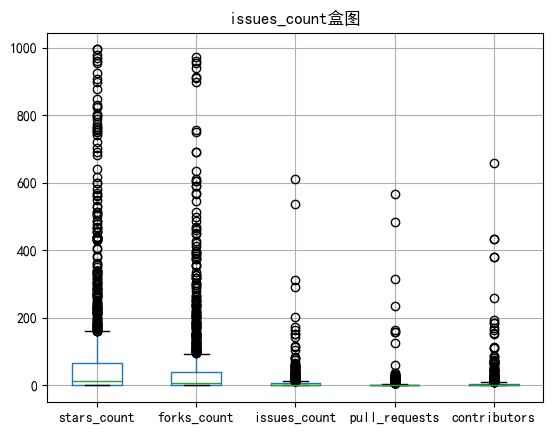

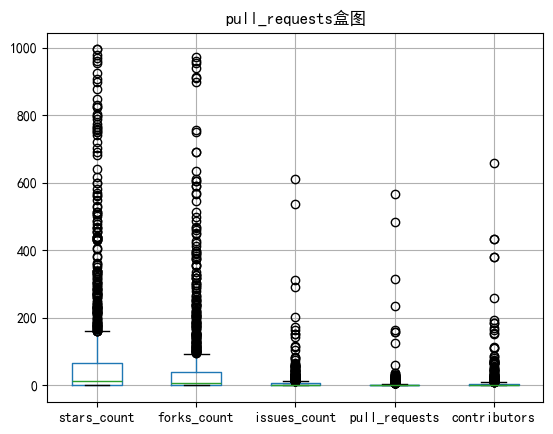

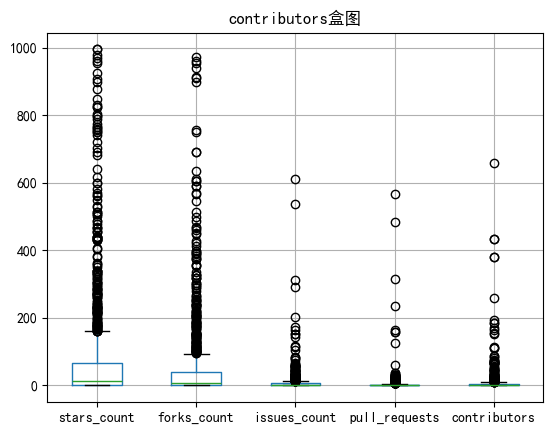

In [7]:
# 为数值列绘制盒图
for name in numeric_column:
    numeric_df.boxplot()
    plt.title(str(name) + "盒图")
    plt.show()

In [8]:
"""
创建数据处理副本
    df_cl_1：将缺失部分剔除
    df_cl_2：用最高频率值来填补缺失值
    df_cl_3：通过属性的相关关系来填补缺失值
    df_cl_4：通过数据对象之间的相似性来填补缺失值
"""

'\n创建数据处理副本\n    df_cl_1：将缺失部分剔除\n    df_cl_2：用最高频率值来填补缺失值\n    df_cl_3：通过属性的相关关系来填补缺失值\n    df_cl_4：通过数据对象之间的相似性来填补缺失值\n'

                       repositories  stars_count  forks_count  issues_count  \
2                    ethereum/aleth            0            0           313   
3             localstack/localstack            0            0           290   
4               education/classroom            0          589           202   
5         shobhit97/open-gpstracker            0            0           172   
6  donnemartin/system-design-primer            0            0           164   

   pull_requests  contributors language  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
5              0             3     Java  
6            164           115   Python  
列stars_count的补充前的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
补充后的五数概括为:
count    907.000000
mean      78.863

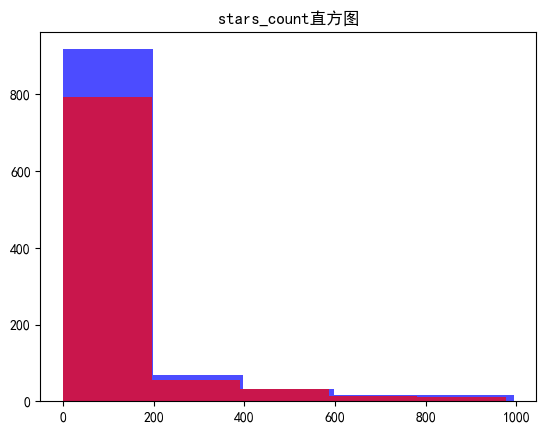

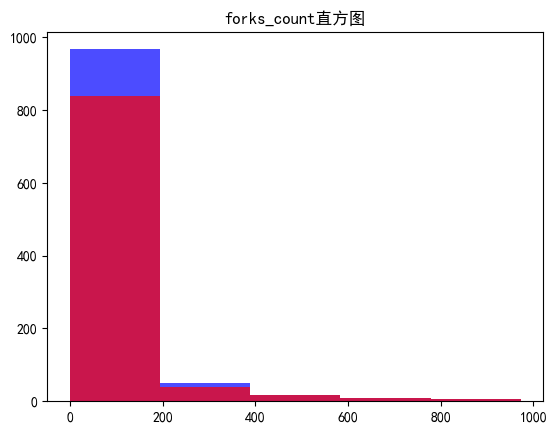

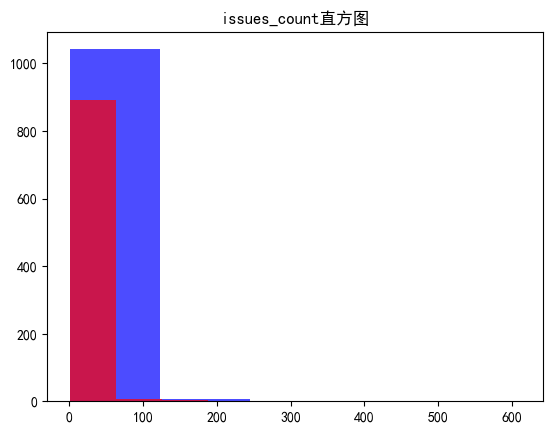

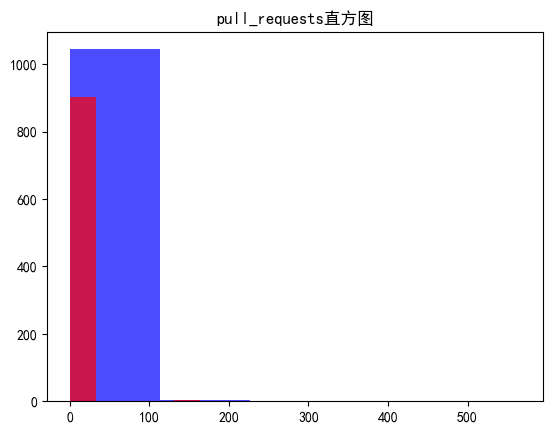

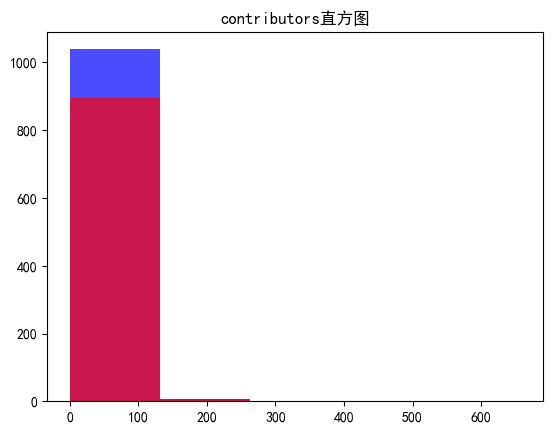

In [9]:
"""1、将缺失部分剔除"""
df_cl_1 = df.dropna()
print(df_cl_1.head())

"""对比"""
# 筛选数值列
numeric_df_1 = df_cl_1.select_dtypes(include=['int64', 'float64'])
numeric_column_1 = numeric_df_1.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_1[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_1[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_1[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors    language  
0            316             2  JavaScript  
1              6            71  JavaScript  
2             27           154         C++  
3             30           434      Python  
4             22            67        Ruby  
列stars_count的补充前的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
补充后的五数概括为:
count    1052.000000
mean       81.976236
std       170.4031

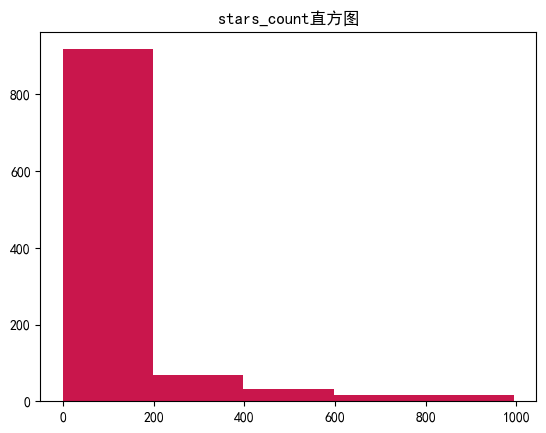

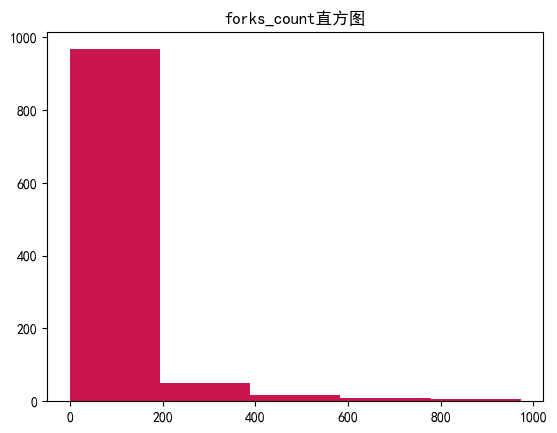

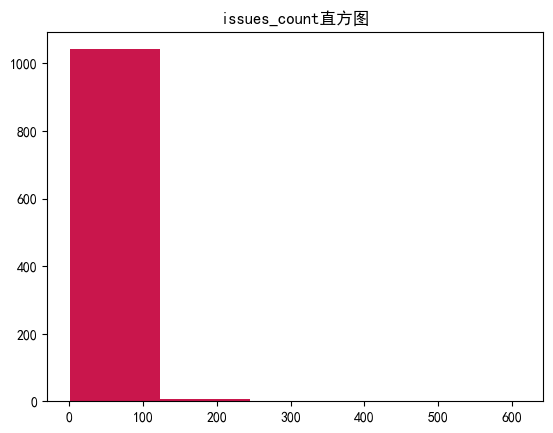

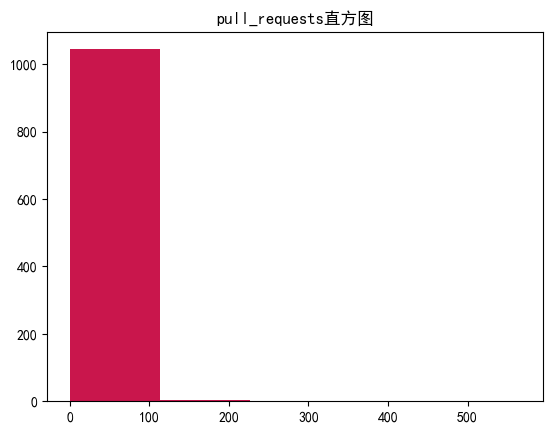

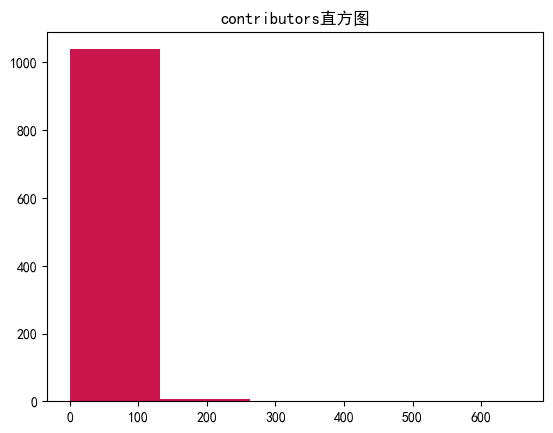

In [10]:
"""2、用最高频率值来填补缺失值"""
modes = df.mode().iloc[0] # 计算众数
df_cl_2 = df.fillna(modes)
print(df_cl_2.head())

"""对比"""
# 筛选数值列
numeric_df_2 = df_cl_2.select_dtypes(include=['int64', 'float64'])
numeric_column_2 = numeric_df_2.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_2[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_2[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_2[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2   Python  
1              6            71     HTML  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
列stars_count的补充前的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
补充后的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.0

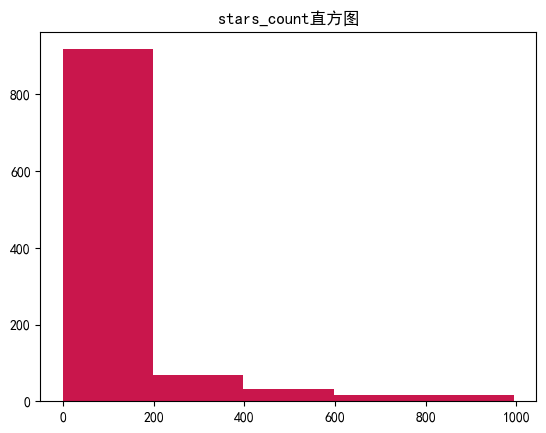

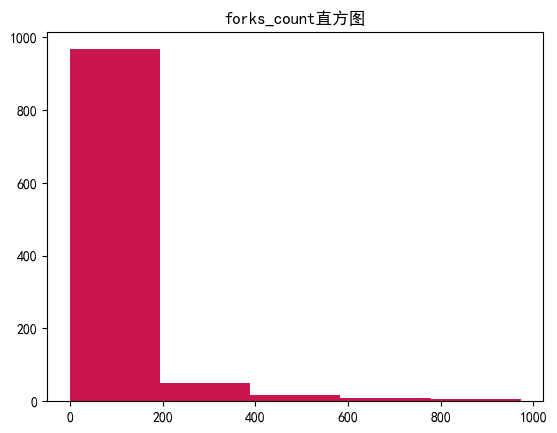

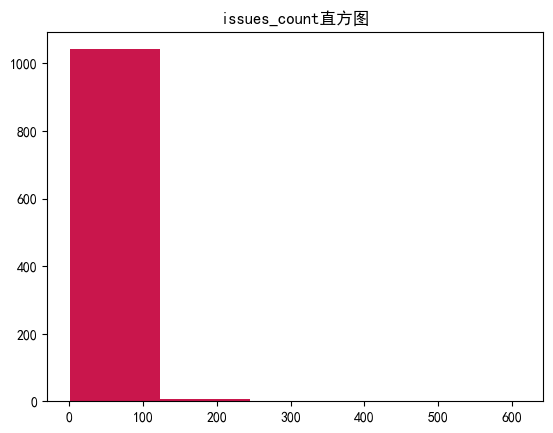

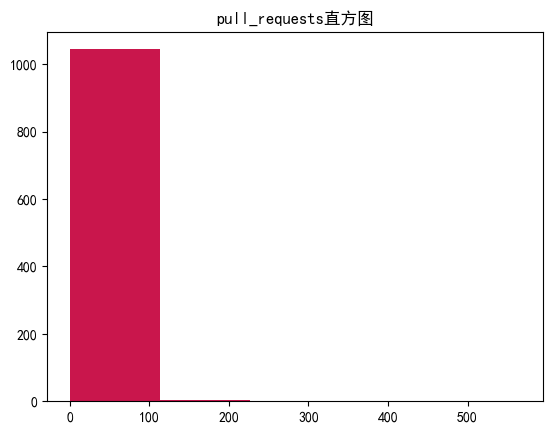

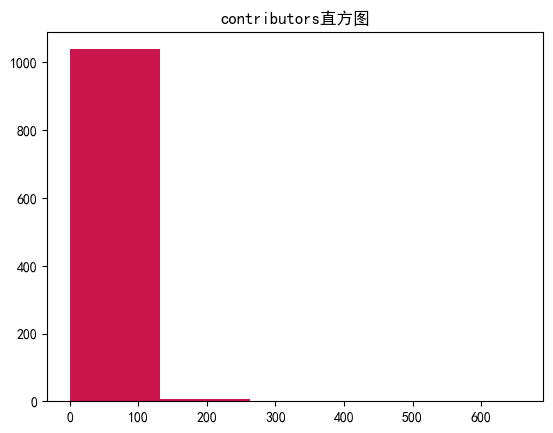

In [11]:
"""3、通过属性的相关关系来填补缺失值"""
df_cl_3 = df.copy(deep=True)
# 首先填补数值属性的缺失值
## 循环遍历数值属性列，利用其他数值属性列对缺失值进行预测（利用线性回归方法）
for name in numeric_column:
    # 划分标签数据和非标签数据
    df_labeled = df_cl_3.dropna()
    df_unlabeled = df_cl_3[df_cl_3[name].isna()]
    # 划分x，y
    X_labeled = df_labeled[[item for item in numeric_column if item != name]]
    y_labeled = df_labeled[name]
    model = LinearRegression().fit(X_labeled, y_labeled)
    # 对非标签值进行训练
    X_unlabeled = df_unlabeled[[item for item in numeric_column if item != name]]
    if X_unlabeled.shape[0] > 0:
        predicted_categories = model.predict(X_unlabeled)
        df_cl_3.loc[df_cl_3[name].isna(), name] = predicted_categories

# 然后填补标称属性的缺失值（默认数值属性填补成功）
## 循环遍历标称属性列，利用数值属性列对标称属性列的缺失值进行预测（利用随机森林算法）
for name in categorical_column:
    # 划分标签数据和非标签数据
    df_labeled = df_cl_3.dropna()
    df_unlabeled = df_cl_3[df_cl_3[name].isna()]
    # 划分x，y
    X_labeled = df_labeled[numeric_column]
    y_labeled = df_labeled[name]
    model = RandomForestClassifier()
    model.fit(X_labeled, y_labeled)
    # 对非标签值进行预测
    X_unlabeled = df_unlabeled[numeric_column]
    if X_unlabeled.shape[0] > 0:
        predicted_categories = model.predict(X_unlabeled)
        df_cl_3.loc[df_cl_3[name].isna(), name] = predicted_categories
print(df_cl_3.head())

"""对比"""
# 筛选数值列
numeric_df_3 = df_cl_3.select_dtypes(include=['int64', 'float64'])
numeric_column_3 = numeric_df_3.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_3[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_3[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_3[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()

   stars_count  forks_count  issues_count  pull_requests  contributors  \
0          0.0          0.0         612.0          316.0           2.0   
1        271.0        150.0         536.0            6.0          71.0   
2          0.0          0.0         313.0           27.0         154.0   
3          0.0          0.0         290.0           30.0         434.0   
4          0.0        589.0         202.0           22.0          67.0   

                repositories                  language  
0        octocat/Hello-World  RioChndr/jaksel-language  
1  EddieHubCommunity/support  RioChndr/jaksel-language  
2             ethereum/aleth                       C++  
3      localstack/localstack                    Python  
4        education/classroom                      Ruby  
列stars_count的补充前的五数概括为:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dt

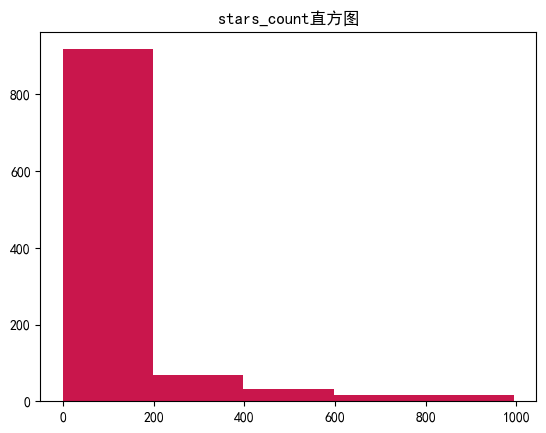

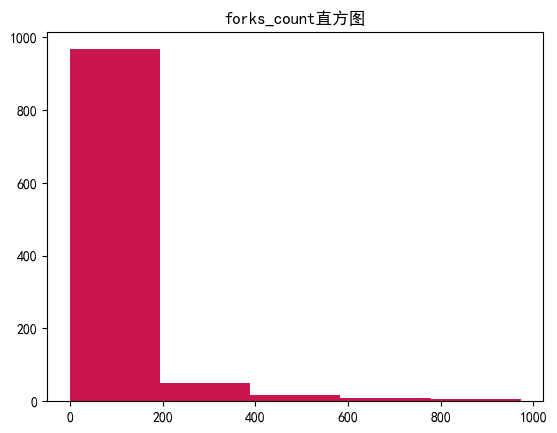

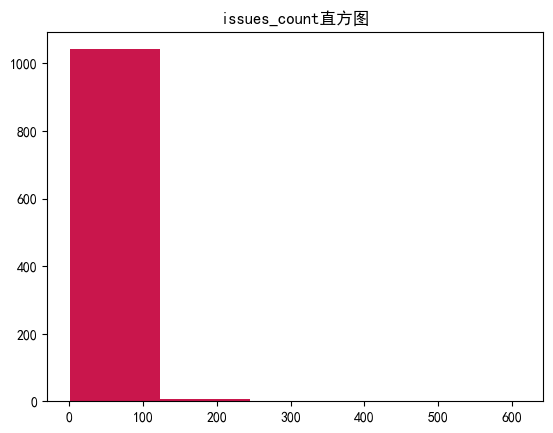

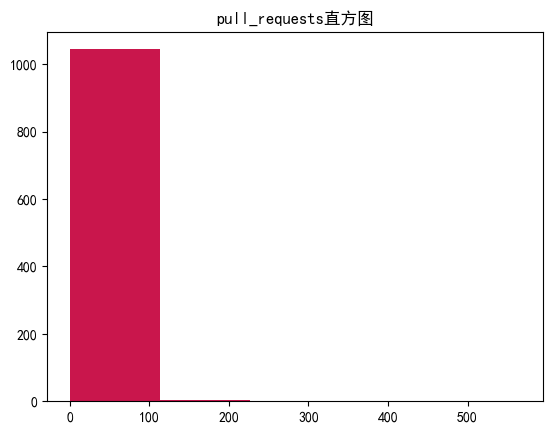

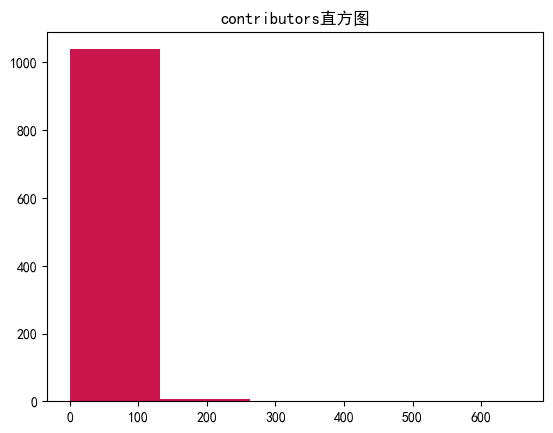

In [12]:
def undummify(df, prefix_sep="_"): # 独热编码的逆向操作
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

"""4、通过数据对象之间的相似性来填补缺失值（尝试使用k-最近邻（k-NN）算法估计对象相似性并填补缺失值）"""
df_encoded = pd.get_dummies(df, columns=categorical_column, prefix_sep=':') 
imputer = KNNImputer(n_neighbors=2) # 创建KNNImputer实例，n_neighbors是k-最近邻算法中的k值
df_cl_4 = undummify(pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns), ':')
print(df_cl_4.head())

"""对比"""
# 筛选数值列
numeric_df_4 = df_cl_4.select_dtypes(include=['int64', 'float64'])
numeric_column_4 = numeric_df_4.columns
# 给出数值列的五数概括及缺失值个数
for name in numeric_column:
    # 输出五数概括
    print("列{0}的补充前的五数概括为:\n{1}\n补充后的五数概括为:\n{2}".format(name, numeric_df[name].describe(), numeric_df_4[name].describe()))
    # 输出缺失值个数
    print("列{0}的缺失值个数为:{1}\n补充后的缺失值个数为{2}".format(name, numeric_df[name].isnull().sum(), numeric_df_4[name].isnull().sum()))
# 为数值列绘制直方图
for name in numeric_column:
    plt.hist(numeric_df[str(name)], bins=5, color='blue', alpha=0.7)
    plt.hist(numeric_df_4[str(name)], bins=5, color='red', alpha=0.7)
    plt.title(str(name) + "直方图")
    plt.show()